In [47]:
import wandb
from pathlib import Path
import os
from tqdm.auto import tqdm
from PIL import Image
import numpy as np
from transformers import MaskFormerFeatureExtractor, MaskFormerForInstanceSegmentation
import requests
import pypac
import matplotlib.pyplot as plt

In [45]:
os.environ['WANDB_NOTEBOOK_NAME']='models.ipynb'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


In [49]:
from transformers import MaskFormerFeatureExtractor, MaskFormerForInstanceSegmentation
from PIL import Image
import requests


image = Image.open('test.jpg')
feature_extractor = MaskFormerFeatureExtractor.from_pretrained("maskformer-swin-base-ade")
inputs = feature_extractor(images=image, return_tensors="pt")

model = MaskFormerForInstanceSegmentation.from_pretrained("maskformer-swin-base-ade")
outputs = model(**inputs)
# model predicts class_queries_logits of shape `(batch_size, num_queries)`
# and masks_queries_logits of shape `(batch_size, num_queries, height, width)`
class_queries_logits = outputs.class_queries_logits
masks_queries_logits = outputs.masks_queries_logits

# you can pass them to feature_extractor for postprocessing
# we refer to the demo notebooks for visualization (see "Resources" section in the MaskFormer docs)
predicted_semantic_map = feature_extractor.post_process_semantic_segmentation(outputs, target_sizes=[image.size[::-1]])[0]

c:\Users\ADMIN\.conda\envs\CamoTorch\lib\site-packages\transformers\models\maskformer\feature_extraction_maskformer.py:29: FutureWarning: The class MaskFormerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use MaskFormerImageProcessor instead.
  warnings.warn(
c:\Users\ADMIN\.conda\envs\CamoTorch\lib\site-packages\transformers\models\maskformer\image_processing_maskformer.py:401: FutureWarning: The `size_divisibility` argument is deprecated and will be removed in v4.27. Please use `size_divisor` instead.
  warnings.warn(
c:\Users\ADMIN\.conda\envs\CamoTorch\lib\site-packages\transformers\models\maskformer\image_processing_maskformer.py:408: FutureWarning: The `max_size` argument is deprecated and will be removed in v4.27. Please use size['longest_edge'] instead.
  warnings.warn(


In [50]:
list(predicted_semantic_map.shape)

[600, 800]

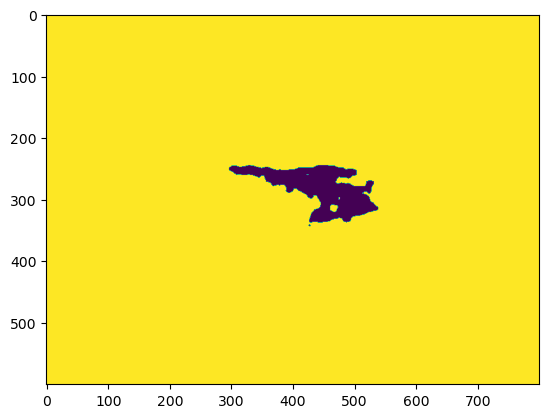

In [51]:
plt.imshow(predicted_semantic_map)

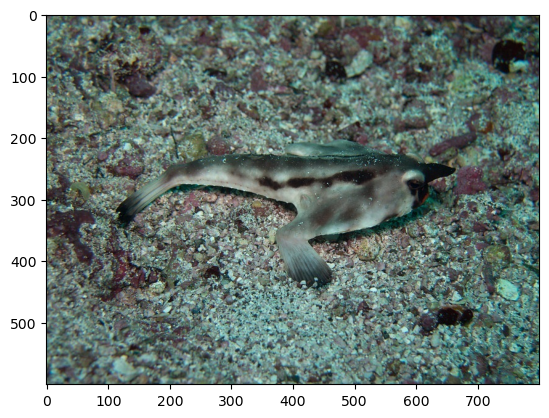

In [52]:
plt.imshow(image)